<a href="https://colab.research.google.com/github/SaidTheCoder/c119/blob/main/c119decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()


Saving c119.csv to c119.csv


In [6]:
import csv
import pandas as pd
colunmnames=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
df=pd.read_csv("c119.csv",names=colunmnames).iloc[1:]
print(df.head(10))

   pregnant glucose  bp skin insulin   bmi pedigree age label
1         6     148  72   35       0  33.6    0.627  50     1
2         1      85  66   29       0  26.6    0.351  31     0
3         8     183  64    0       0  23.3    0.672  32     1
4         1      89  66   23      94  28.1    0.167  21     0
5         0     137  40   35     168  43.1    2.288  33     1
6         5     116  74    0       0  25.6    0.201  30     0
7         3      78  50   32      88    31    0.248  26     1
8        10     115   0    0       0  35.3    0.134  29     0
9         2     197  70   45     543  30.5    0.158  53     1
10        8     125  96    0       0     0    0.232  54     1


In [9]:
features=["pregnant","insulin","bmi","age","glucose","bp","pedigree"]
X=df[features]
y=df.label



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
cls=DecisionTreeClassifier()
cls=cls.fit(X_train,y_train)

y_pred=cls.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.75


In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

data=StringIO()
export_graphviz(cls,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=["0","1"])
print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
1 [label=<age &le; 28.5<br/>gini = 0.325<br/>samples = 382<br/>value = [304, 78]<br/>class = 0>, fillcolor="#eca16c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 45.4<br/>gini = 0.191<br/>samples = 215<br/>value = [192, 23]<br/>class = 0>, fillcolor="#e89051"] ;
1 -> 2 ;
3 [label=<bmi &le; 30.45<br/>gini = 0.165<br/>samples = 210<br/>value = [191, 19]<br/>class = 0>, fillcolor="#e88e4d"] ;
2 -> 3 ;
4 [label=<pregnant &le; 7.5<br/>gini = 0.05<br/>samples = 116<br/>value = [113, 3]<br/>class = 0>, fillcolor="#e6843e"] ;
3 -> 4 ;
5 [label=<glucose &le; 128.5<br/>gini = 0.034<br/>samples = 115<br/>value = [113, 2]<br/>class = 0>, fillcolor="#e5833d"] ;
4 -> 5 ;
6 [label=<pedigree &le; 0.668<br/>gini = 0.018<

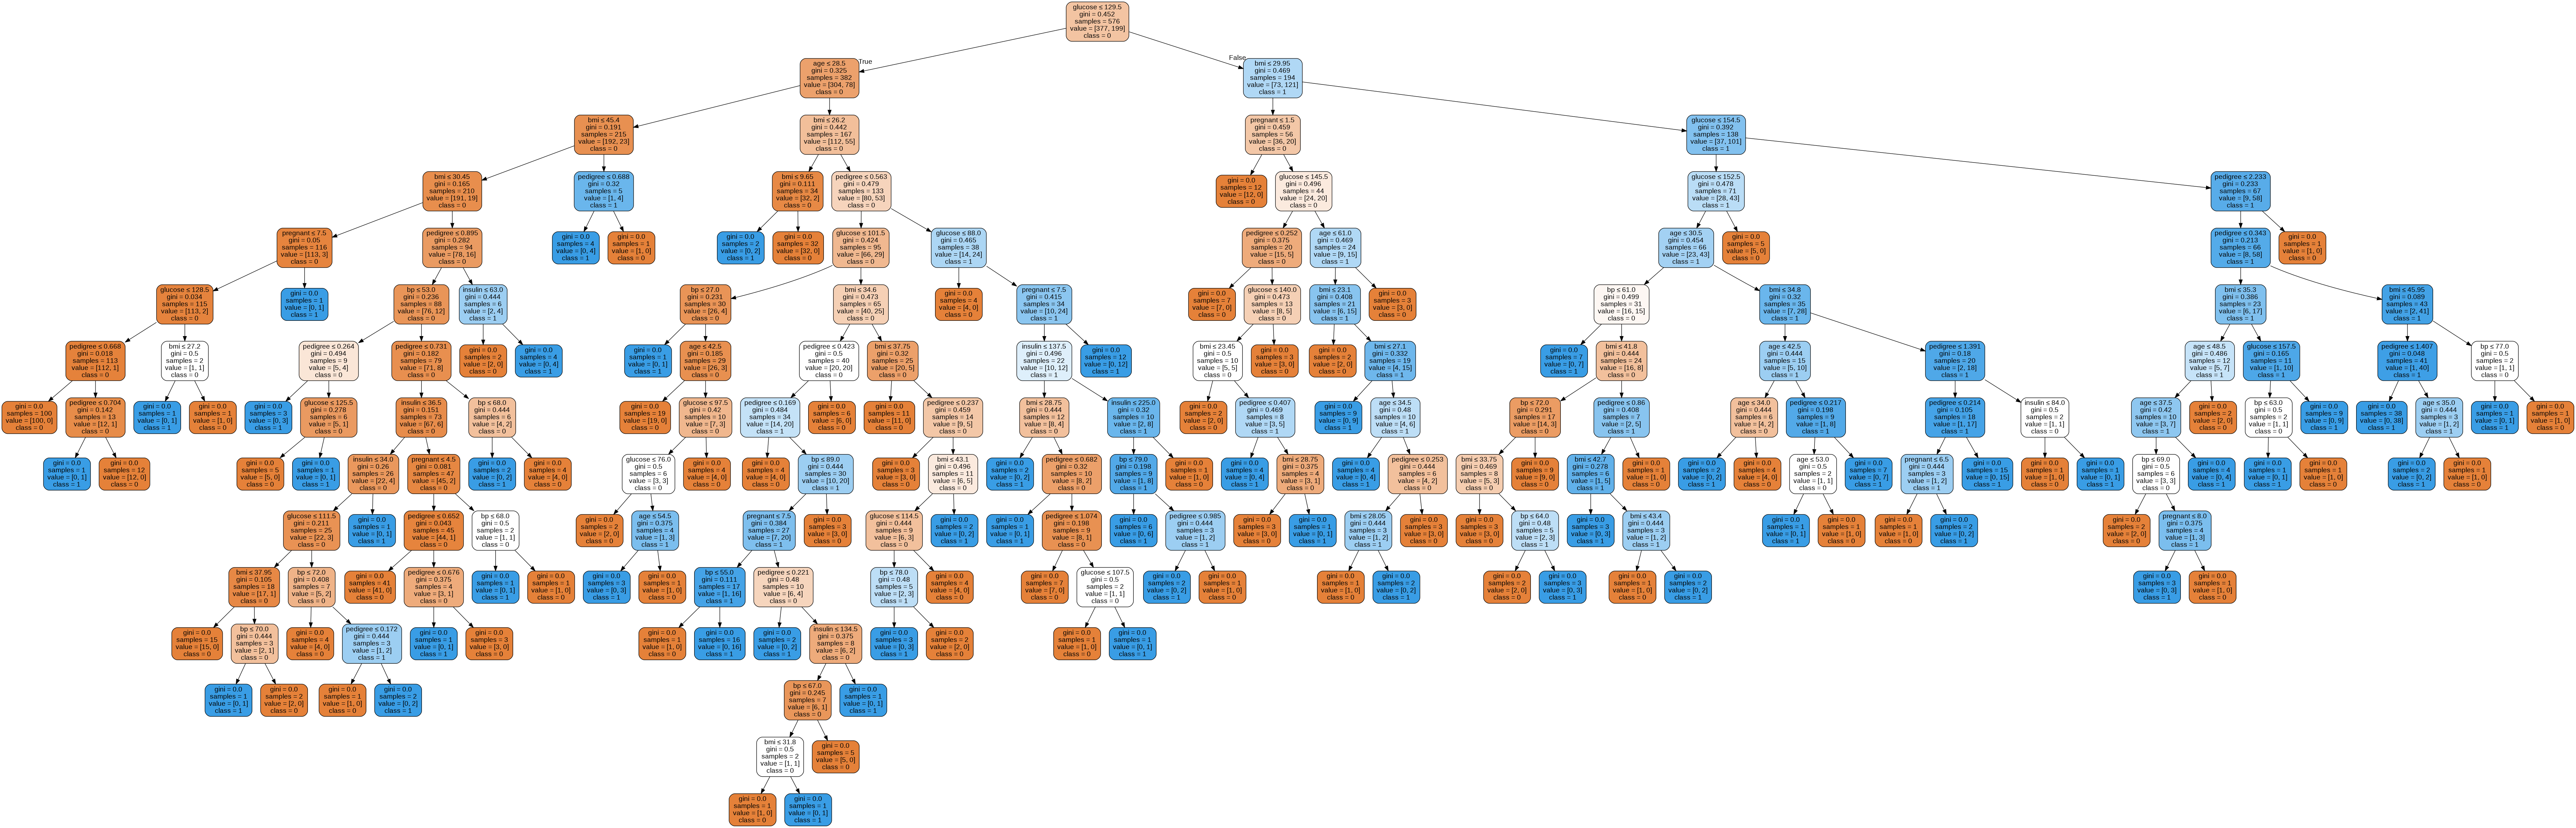

In [15]:
graph=pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
cls=DecisionTreeClassifier(max_depth=0.5)
cls=cls.fit(X_train,y_train)

y_pred=cls.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.640625


In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

data=StringIO()
export_graphviz(cls,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=["0","1"])
print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
}


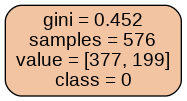

In [29]:
graph=pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())